In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("cc1/airline_satisfaction.csv")
df.drop('Unnamed: 0', inplace = True, axis=1)
df =df.dropna()
df = df.reset_index()

In [28]:
#df = df.sample(n=50000)
df.iloc[[129486]]

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129486,129879,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [29]:
ordinal = ["Departure/Arrival time convenient","Ease of Online booking","Gate location",
           "Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
           "Baggage handling","Checkin service","Inflight service","Cleanliness"]
df["Note_totale"]=df["Inflight wifi service"]
print(len(ordinal))
for i in ordinal:
    df["Note_totale"]+=df[i]

13


In [30]:
ordinal += ["Inflight wifi service"]
target=["satisfaction"]
quantitative =["Arrival Delay in Minutes","Departure Delay in Minutes","Age","Flight Distance","Note_totale"]#"Arrival Delay in Minutes","Departure Delay in Minutes",
ordinal+=["Class"]
qualitative=["Gender","Customer Type","Type of Travel"]
features=quantitative+qualitative+ordinal

Preprocessing : 


In [31]:
X_qualitative = df[qualitative].values
X_ordinal = df [ordinal].values
X_quantitative_n = df[["Age","Arrival Delay in Minutes","Departure Delay in Minutes","Note_totale"]].values
X_quantitative_2 = df[["Flight Distance"]].values

In [32]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
#one_hot_encoder.fit(X_qualitative)
one_hot_encoded_X = one_hot_encoder.fit_transform(X_qualitative)
one_hot_encoded_X.toarray()
one_hot_encoder.get_feature_names_out()
X_encoded = np.concatenate([one_hot_encoded_X.toarray(),X_qualitative], axis =1) # faire ça pour chaque puis insert

In [33]:
one_hot_encoded_X

<129487x6 sparse matrix of type '<class 'numpy.float64'>'
	with 388461 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_vars = []
for categorical_var in X_ordinal.T:
    encoded_vars.append(label_encoder.fit_transform(categorical_var))
    print(f"===== Encoded classes: {label_encoder.classes_}")

===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: ['Business' 'Eco' 'Eco Plus']


In [35]:
encoded_vars

[array([4, 2, 2, ..., 5, 3, 5]),
 array([3, 3, 2, ..., 1, 3, 2]),
 array([1, 3, 2, ..., 5, 3, 5]),
 array([5, 1, 5, ..., 2, 4, 4]),
 array([3, 3, 5, ..., 1, 4, 2]),
 array([5, 1, 5, ..., 2, 4, 2]),
 array([5, 1, 5, ..., 2, 4, 1]),
 array([4, 1, 4, ..., 4, 3, 1]),
 array([3, 5, 3, ..., 3, 2, 2]),
 array([3, 2, 3, ..., 3, 4, 0]),
 array([4, 1, 4, ..., 5, 4, 1]),
 array([5, 4, 4, ..., 4, 5, 1]),
 array([5, 1, 5, ..., 2, 4, 1]),
 array([3, 3, 2, ..., 2, 3, 2]),
 array([2, 0, 0, ..., 1, 0, 1])]

In [36]:
X_ordinal = np.array(encoded_vars).T

In [37]:
X_ordinal

array([[4, 3, 1, ..., 5, 3, 2],
       [2, 3, 3, ..., 1, 3, 0],
       [2, 2, 2, ..., 5, 2, 0],
       ...,
       [5, 1, 5, ..., 2, 2, 1],
       [3, 3, 3, ..., 4, 3, 0],
       [5, 2, 5, ..., 1, 2, 1]])

In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X=X_quantitative_2)

In [39]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(X=X_quantitative_n)

In [40]:
X_encoded = pd.concat([pd.DataFrame(one_hot_encoded_X.toarray()),pd.DataFrame(X_ordinal),pd.DataFrame(X_min_max_scaled),pd.DataFrame(standard_scaled)],axis=1)

In [41]:
X_encoded.head()

,0,1,2,3,4,5,0,1,2,3,...,10,11,12,13,14,0,0,1,2,3
0,0.0,1.0,1.0,0.0,0.0,1.0,4,3,1,5,...,4,5,5,3,2,0.086632,-1.748219,0.075623,0.273026,0.930681
1,0.0,1.0,0.0,1.0,1.0,0.0,2,3,3,1,...,1,4,1,3,0,0.041195,-0.954439,-0.236345,-0.359673,-1.443960
2,1.0,0.0,1.0,0.0,1.0,0.0,2,2,2,5,...,4,4,5,2,0,0.224354,-0.888290,-0.392329,-0.386036,0.714805
3,1.0,0.0,1.0,0.0,1.0,0.0,5,5,5,2,...,1,4,2,2,0,0.107229,-0.954439,-0.158353,-0.096049,-0.364578
4,0.0,1.0,1.0,0.0,1.0,0.0,3,3,3,4,...,3,3,3,3,0,0.036955,1.426902,-0.392329,-0.386036,0.390990


In [42]:
pd.DataFrame(one_hot_encoded_X.toarray()).head()
#one_hot_encoded_X.shape

,0,1,2,3,4,5
0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0


In [43]:
X_ordinal.shape

(129487, 15)

In [22]:
X_min_max_scaled.shape

(129487, 1)

In [23]:
standard_scaled.shape

(129487, 4)

*KNN :*

In [44]:
df2 = pd.concat([X_encoded,df.satisfaction],axis=1  )
df2 = df2.dropna()
#df2 = df2.sample(n=50000)
#X = X_encoded
#y = df.satisfaction

In [45]:
df2.shape

(129487, 27)

In [46]:
df2 = df2.sample(n=1000)

In [122]:
df2.head()

,0,1,2,3,4,5,0,1,2,3,...,11,12,13,14,0,0,1,2,3,satisfaction
57096,1.0,0.0,1.0,0.0,1.0,0.0,3,4,3,3,...,3,3,3,1,0.062399,-1.020587,-0.132356,-0.386036,-0.256640,neutral or dissatisfied
39780,0.0,1.0,1.0,0.0,1.0,0.0,4,4,4,4,...,5,5,4,0,0.331583,0.434677,1.921433,0.668463,1.686249,satisfied
5434,0.0,1.0,1.0,0.0,0.0,1.0,1,2,2,3,...,1,3,2,1,0.318457,-1.682070,-0.392329,-0.386036,-1.659836,neutral or dissatisfied
109787,0.0,1.0,1.0,0.0,1.0,0.0,5,5,5,1,...,4,3,5,0,0.023425,0.037786,-0.392329,-0.280586,0.930681,satisfied
91098,0.0,1.0,1.0,0.0,0.0,1.0,4,2,5,5,...,5,5,2,1,0.297456,-1.086735,-0.236345,-0.254223,0.714805,neutral or dissatisfied


In [47]:
X = df2.drop(["satisfaction"],axis=1)
y = df2.satisfaction

In [22]:
y.value_counts()

neutral or dissatisfied    563
satisfied                  437
Name: satisfaction, dtype: int64

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
cross_val_accuracies=[]
all_accuracies=[]
cross_val_precisions=[]
all_precisions=[]
cross_val_recalls=[]
all_recalls=[]
#for j in [1,2]:
    #print("metrique : ",j)
j=1
for i in range(1,15,2):
        print(i)
        cross_val_accuracy = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=i, p=j), X=X, y=y,cv=5, scoring="accuracy")
        cross_val_precision = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=i, p=j), X=X, y=y,cv=5, scoring="precision_macro")
        cross_val_recall =cross_val_score(estimator=KNeighborsClassifier(n_neighbors=i, p=j), X=X, y=y, cv=5, scoring="recall_macro")
        print("========================================")
        print(f"=== Average accuracy: {np.mean(cross_val_accuracy)}")
        print(f"=== Median accuracy: {np.median(cross_val_accuracy)}")
        all_accuracies.append(cross_val_accuracy)
        cross_val_accuracies.append(np.median(cross_val_accuracy))
        print("========================================")
        print("========================================")
        print(f"=== Average precision: {np.mean(cross_val_precision)}")
        cross_val_precisions.append(np.mean(cross_val_precision))
        all_precisions.append(cross_val_precision)
        print(f"=== Median precision: {np.median(cross_val_precision)}")
        print("========================================")
        print(f"=== Average precision: {np.mean(cross_val_recall)}")
        cross_val_recalls.append(np.mean(cross_val_recall))
        all_recalls.append(cross_val_recall)
        print(f"=== Median precision: {np.median(cross_val_recall)}")
        print("========================================")

1


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

=== Average accuracy: 0.882
=== Median accuracy: 0.875
=== Average precision: 0.8827429371550573
=== Median precision: 0.8790458175704077
=== Average precision: 0.8769795965526083
=== Median precision: 0.8695453158376564
3


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

=== Average accuracy: 0.8960000000000001
=== Median accuracy: 0.91
=== Average precision: 0.897874457619203
=== Median precision: 0.909462915601023
=== Average precision: 0.8906870045009125
=== Median precision: 0.9018411148408096
5


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

=== Average accuracy: 0.8960000000000001
=== Median accuracy: 0.9
=== Average precision: 0.8976740497347541
=== Median precision: 0.9020833333333333
=== Average precision: 0.8906546710397144
=== Median precision: 0.8916692096429661
7


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

=== Average accuracy: 0.9019999999999999
=== Median accuracy: 0.91
=== Average precision: 0.9031060942317206
=== Median precision: 0.9107069036792064
=== Average precision: 0.8973134840493445
=== Median precision: 0.9053447572419421
9


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

=== Average accuracy: 0.9120000000000001
=== Median accuracy: 0.915
=== Average precision: 0.9127468025305159
=== Median precision: 0.91875
=== Average precision: 0.9080199309580379
=== Median precision: 0.9089105889533109
11


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

=== Average accuracy: 0.907
=== Median accuracy: 0.9
=== Average precision: 0.9072680951032576
=== Median precision: 0.9003720545680034
=== Average precision: 0.9033194773807083
=== Median precision: 0.8951448388412893
13


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

=== Average accuracy: 0.905
=== Median accuracy: 0.905
=== Average precision: 0.9054406891960248
=== Median precision: 0.9047986819071157
=== Average precision: 0.9010339922163138
=== Median precision: 0.9009587923296614


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [112]:
print(cross_val_accuracies)
print(cross_val_precisions)
print(cross_val_recalls)

[0.875, 0.895, 0.895, 0.895, 0.895, 0.89, 0.89, 0.86, 0.865, 0.865, 0.87, 0.875, 0.875, 0.865]
[0.8706179816017201, 0.8936322585460517, 0.9022312689838319, 0.8971725292730607, 0.8934794579964839, 0.8893237022014249, 0.8898110003372318, 0.8591040926685007, 0.8614149518218139, 0.8763604303341299, 0.8707988440009764, 0.8725916660264534, 0.8781358438943301, 0.8677389918532914]
[0.8684552813064048, 0.8895724549516686, 0.8992474690508399, 0.8942975753369012, 0.8895677305789664, 0.8857494761286896, 0.8850430879223014, 0.8556515821965262, 0.8590048762099324, 0.8722742094933107, 0.8673195914066701, 0.8677254355625141, 0.8722138525509312, 0.860471313280302]


In [113]:
print(all_precisions)
print(all_accuracies)
print(all_recalls)

[array([0.85316855, 0.88595407, 0.84292929, 0.89799504, 0.87304295]), array([0.89375   , 0.90065681, 0.89407468, 0.89634647, 0.88333333]), array([0.89625167, 0.89189748, 0.92451299, 0.91544268, 0.88305153]), array([0.89625167, 0.89189748, 0.89343434, 0.92122762, 0.88305153]), array([0.88156263, 0.90223233, 0.89407468, 0.91099744, 0.87853022]), array([0.88595407, 0.89189748, 0.89053708, 0.90524276, 0.87298712]), array([0.87291667, 0.89189748, 0.89053708, 0.9097752 , 0.88392857]), array([0.83908046, 0.87824675, 0.83289843, 0.88544827, 0.85984655]), array([0.86684303, 0.83737374, 0.86908758, 0.87582102, 0.85794939]), array([0.86684303, 0.85795455, 0.8996033 , 0.89376491, 0.86363636]), array([0.87122778, 0.84299664, 0.88943139, 0.89504284, 0.85529557]), array([0.87291667, 0.84934319, 0.88484292, 0.87853022, 0.87732534]), array([0.87721755, 0.85646851, 0.88484292, 0.90076726, 0.87138297]), array([0.86865781, 0.84773512, 0.87138297, 0.88392857, 0.86699049])]
[array([0.855, 0.885, 0.845, 0.89

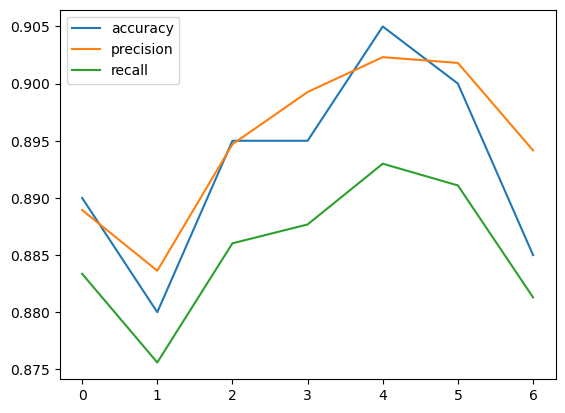

In [24]:
plt.plot(cross_val_accuracies, label = "accuracy")
plt.plot(cross_val_precisions, label = "precision")
plt.plot(cross_val_recalls, label = "recall")
plt.legend()
plt.show()

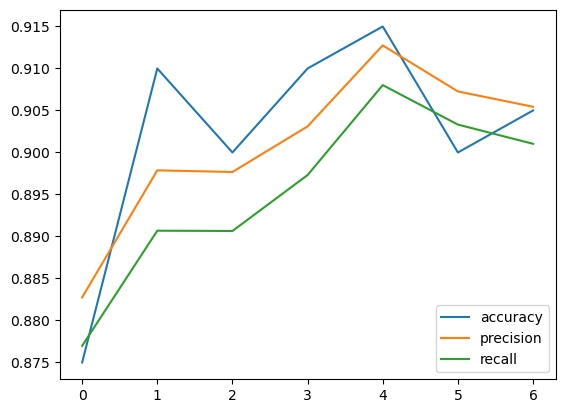

In [49]:
plt.plot(cross_val_accuracies, label = "accuracy")
plt.plot(cross_val_precisions, label = "precision")
plt.plot(cross_val_recalls, label = "recall")
plt.legend()
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
print("euclidean")
l = [1,3,5,7,9]
accuracy_scores=[]
recall_scores=[]
precision_scores=[]
accuracy_scores2=[]
recall_scores2=[]
precision_scores2=[]
for i in l:
    knn = KNeighborsClassifier(n_neighbors= i, metric = "manhattan")
    knn.fit(X, y)
    prediction_knn=knn.predict(X)
    print(i, "accuracy=",accuracy_score(y, prediction_knn)," recall ",recall_score(y, prediction_knn)," precisions",precision_score(y, prediction_knn))
    accuracy_scores.append(accuracy_score(y, prediction_knn))
    recall_scores.append(recall_score(y, prediction_knn))
    precision_scores.append(precision_score(y, prediction_knn))
print("Manhattan")
for j in l:
    knn = KNeighborsClassifier(n_neighbors= j, metric = "euclidean")
    knn.fit(X, y)
    prediction_knn=knn.predict(X)
    print(j, "accuracy=",accuracy_score(y, prediction_knn)," recall ",recall_score(y, prediction_knn)," precisions",precision_score(y, prediction_knn))
    accuracy_scores2.append(accuracy_score(y, prediction_knn))
    recall_scores2.append(recall_score(y, prediction_knn))
    precision_scores2.append(precision_score(y, prediction_knn))

euclidean


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


ValueError: pos_label=1 is not a valid label. It should be one of ['neutral or dissatisfied', 'satisfied']